In [1]:
import numpy as np
import matplotlib as plt

class Ball:
    """Stores information about a particle with mass, position, and velocity."""

    def __init__(self, coordinate, x_velocity, y_velocity):
        """Create a particle with position (numpy array of len 2) and mass."""
        self.center = coordinate   # Sets x position
        self.x_pos, self.y_pos = self.center
        self.x_vel = x_velocity
        self.y_vel = y_velocity

Please select a material: Wood (w) Plastic (p) or Rubber (r)? w
How many balls would you like? w
Not a valid input. Please input an integer from 1-49 10


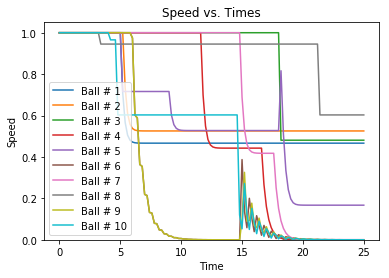

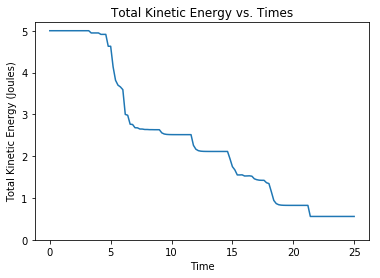

In [52]:
import sys
import numpy as np
import pdb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from random import shuffle

time_step = 0.2
num_iterations = 125

def main():
    
    material = get_material()
    coeff_dict = {}
    dictionary_init(coeff_dict)
    restitution_coefficient = coeff_dict[material]
    num_balls = get_number()
    ball_dict = {}
    points = make_points()
    dt = time_step
    init_dynamics(restitution_coefficient, dt, num_balls, points)
    
def get_material():
    """This function prompts the user to choose a material for the kinds of balls he or she would like to see
        simulated. The three options are wood, plastic, or rubber. If it is an improper input, it will continue
        to prompt the user."""
    material = input("Please select a material: Wood (w) Plastic (p) or Rubber (r)? ")
    while(True):
        if material == "w":
            material = "wood"
            break
        elif material == "p":
            material = "plastic"
            break
        elif material == "r":
            material = "rubber"
            break
        else:
            material = input("Not a valid input. Please input either w, p, or r ")
    return material

def get_number():
    """This function prompts the user to input the number of balls he or she would like. It must be an
        integer between 1-49 or else it will keep prompting the user."""
    str_num = input("How many balls would you like? ")
    while(True):
        try:
            num = int(str_num)
        except ValueError:
            str_num = input("Not a valid input. Please input an integer from 1-49 ")
            continue
        if num > 0 and num < 50:
                return num
        else:
            str_num = input("Not a valid input. Please input an integer from 1-49 ")

def init_dynamics(coef, dt, num_balls, points):
    x = [i for i in range(49)]
    shuffle(x)
    ball_list = []
    speed_dict = {}
    
    for j in range(num_balls):
        index = x[j]
        circle = plt.Circle(points[index], radius=1, fc='y')
        angle = np.array([random.vonmisesvariate(0, 0)])
        x_velocity = np.cos(angle)
        y_velocity = np.sin(angle)
        b = Ball(points[index], x_velocity[0], y_velocity[0])
        ball_list.append(b)
        speed_dict[b] = [1]
    for i in range(num_iterations):
        run_dynamics(dt, ball_list, speed_dict, coef)
    plot_data(speed_dict, dt, num_iterations)
    

def plot_data(speed_dict, dt, num_iterations):
    counter = 1
    x = [i * dt for i in range(num_iterations + 1)]
    plt.figure(1)
    plt.ylim(0,1.05)
    plt.xlabel("Time")
    plt.ylabel("Speed")
    plt.title("Speed vs. Times")
    keys = speed_dict.keys()
    counter = 1
    kinetic_list = [0] * (num_iterations + 1)
    for speed_list in speed_dict.values():
        plt.plot(x,speed_list, label = 'Ball # %s'%counter)
        counter += 1
        for i in range(num_iterations + 1):
            kinetic_list[i] += 0.5 * speed_list[i]**2
    plt.legend()
    plt.figure(2)
    plt.ylim(0,((counter - 1)/2) + 0.2)
    plt.xlabel("Time")
    plt.ylabel("Total Kinetic Energy (Joules)")
    plt.title("Total Kinetic Energy vs. Times")
    plt.plot(x, kinetic_list)

    
    plt.show()
    
    
def dictionary_init(coeff_dict):
    """Initializes the dictionary for coefficients of restitution, passed in an empty dictionary"""
    coeff_dict["wood"] = 0.603
    coeff_dict["plastic"] = 0.688
    coeff_dict["rubber"] = 0.828

def run_dynamics(dt, ball_list, speed_dict, coef):
    """Supposed to update the positions of the balls after each frame. Takes arguments dt which is the time 
        step, the list of balls, and the dictionary of balls to the list of its speeds
        correct coefficient of restitution for the material"""
    used = [] # reinitializes used to empty before each iteration
    for ball in ball_list:
        if ball in used:  #So the collision won't happen twice
            ball.x_pos = ball.x_vel * dt + ball.x_pos
            ball.y_pos = ball.y_vel * dt + ball.y_pos
            x = ball.x_pos
            y = ball.y_pos
            ball.center = (x,y)
            speed_list = speed_dict[ball]
            speed_list.append((ball.x_vel**2 + ball.y_vel**2)**0.5)
            speed_dict[ball] = speed_list
            continue
        check_collisions(ball, ball_list, coef, used)
        speed_list = speed_dict[ball]
        speed_list.append((ball.x_vel**2 + ball.y_vel**2)**0.5)
        speed_dict[ball] = speed_list
        ball.x_pos = ball.x_vel * dt + ball.x_pos
        ball.y_pos = ball.y_vel * dt + ball.y_pos
        x = ball.x_pos
        y = ball.y_pos
        ball.center = (x,y)

def check_collisions(ball, ball_list, coef, used):
    if(check_wall_collision(ball, coef)): #Wall collisions should be checked before balls
        return   
    for i in ball_list:
        if i is not ball and collision(ball, i):   #Don't check collisions between the same object
                                                   #Collision method checks Ball collision
                used.append(i)
                determine_new_x_vels(ball, i, coef)
                determine_new_y_vels(ball, i, coef)

                
def collision(ball_one, ball_two):
    """This function checks the collision of a ball with another ball by treating both as squares with sides
        of length sqrt(2). If the absolute value of the difference between the x and y components is less than
        the sqrt(2), then the balls have collided and the function returns true. If not, it returns false."""
    x1 = ball_one.x_pos
    x2 = ball_two.x_pos
    y1 = ball_one.y_pos
    y2 = ball_two.y_pos
    x_diff = x1 - x2
    y_diff = y1 - y2
    ar = np.array([x_diff, y_diff])
    abs_ar = np.absolute(ar)
    if abs_ar[0] < 2**0.5 and abs_ar[1] < 2**0.5 :
        return True
    else:
        return False   


def check_wall_collision(ball, coef):
    """This function checks the collision of a ball with the wall by treating it as a square with sides
        of length sqrt(2). Based on what wall it hits, it changes the corresponding sign of velocity. If there
        is a collision with a wall, the function will return true. If not, it returns false."""
    x = ball.x_pos
    y = ball.y_pos
    if x - 0.5*(2**.5) < 0:
        ball.x_vel = -(ball.x_vel * coef)
        return True
    elif x + 0.5*(2**.5) > 22:
        ball.x_vel = -(ball.x_vel * coef)
        return True
    elif y - 0.5*(2**.5) < 0:
        ball.y_vel = -(ball.y_vel * coef)
        return True
    elif y + 0.5*(2**.5) > 22:
        ball.y_vel = -(ball.y_vel * coef)
        return True
    else:
        return False
                
def determine_new_x_vels(ball_one, ball_two, coef):
    """This function determines the new x_velocities of the two balls by using the equation for a coefficient
        of restitution as well as the conservation of momentum. It sets the values of the Ball class to those"""
    initial_vel_1 = ball_one.x_vel
    initial_vel_2 = ball_two.x_vel
    ball_two.x_vel = ((1 + coef)* initial_vel_1 + (1 - coef) * initial_vel_2) / 2
    ball_one.x_vel = ball_two.x_vel - (initial_vel_1 + initial_vel_2)
    
def determine_new_y_vels(ball_one, ball_two, coef):
    """This function determines the new y_velocities of the two balls by using the equation for a coefficient
        of restitution as well as the conservation of momentum. It sets the values of the Ball class to those"""
    initial_vel_1 = ball_one.y_vel
    initial_vel_2 = ball_two.y_vel
    ball_two.y_vel = ((1 + coef)* initial_vel_1 + (1 - coef) * initial_vel_2) / 2
    ball_one.y_vel = ball_two.y_vel - (initial_vel_1 + initial_vel_2)
        
def make_points():
    """This function makes a list of 49 points using a double for-loop list comprehension and returns it"""
    points = [(i*3 + 2, j*3 + 2) for i in range(7) for j in range(7)]
    return points

main()